# 1、类的使用

In [ ]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset,
                         batch_size=1,
                         shuffle=None,
                         sampler=None,
                         batch_sampler=None,
                         num_workers=0,
                         collate_fn=None,
                         pin_memory=False,
                         drop_last=False,
                         timeout=0
                         )

# 参数：
# dataset ： 加载数据的数据集
# batch size ： 每批返回的数据量，默认值是 1
# shuffle：是否在每个 epoch 内将数据打乱顺序，提高准确度。默认值为False
# sampler ：从数据集中提取的样本序列。可以用来自定义样本的采样策路。默认值为None
# batch_sampler: 与sampler类似，但是一次返回一个 batch 的索引，用于自定义 batch 。它与 batch size、shuffle、sampler 和 drop last 互斥
# num workers : 用于数据加载的子进程数。0表示主进程加载。默认值为0
# collate_fn: 用于指定如何组合样本数据。如果为None，那么将默认使用默认的组合方法
# pin_memory : 将数据固定在内存的锁页内存中，加速数据读取的速度。默认值为False.
# drop_last : 如果数据集的大小不能被 batch _size 整除，那么是否丢弃最后一个数据批次。默认值为 False
# timeout : workers 等待 collect 一个 batch 的数据的超时时间。默认为0，表示一直等待

# 2、参数详解
## 1）pin_memory 
pin_memory : 将数据固定在内存的锁页内存中，加速数据读取的速度。默认值为False.

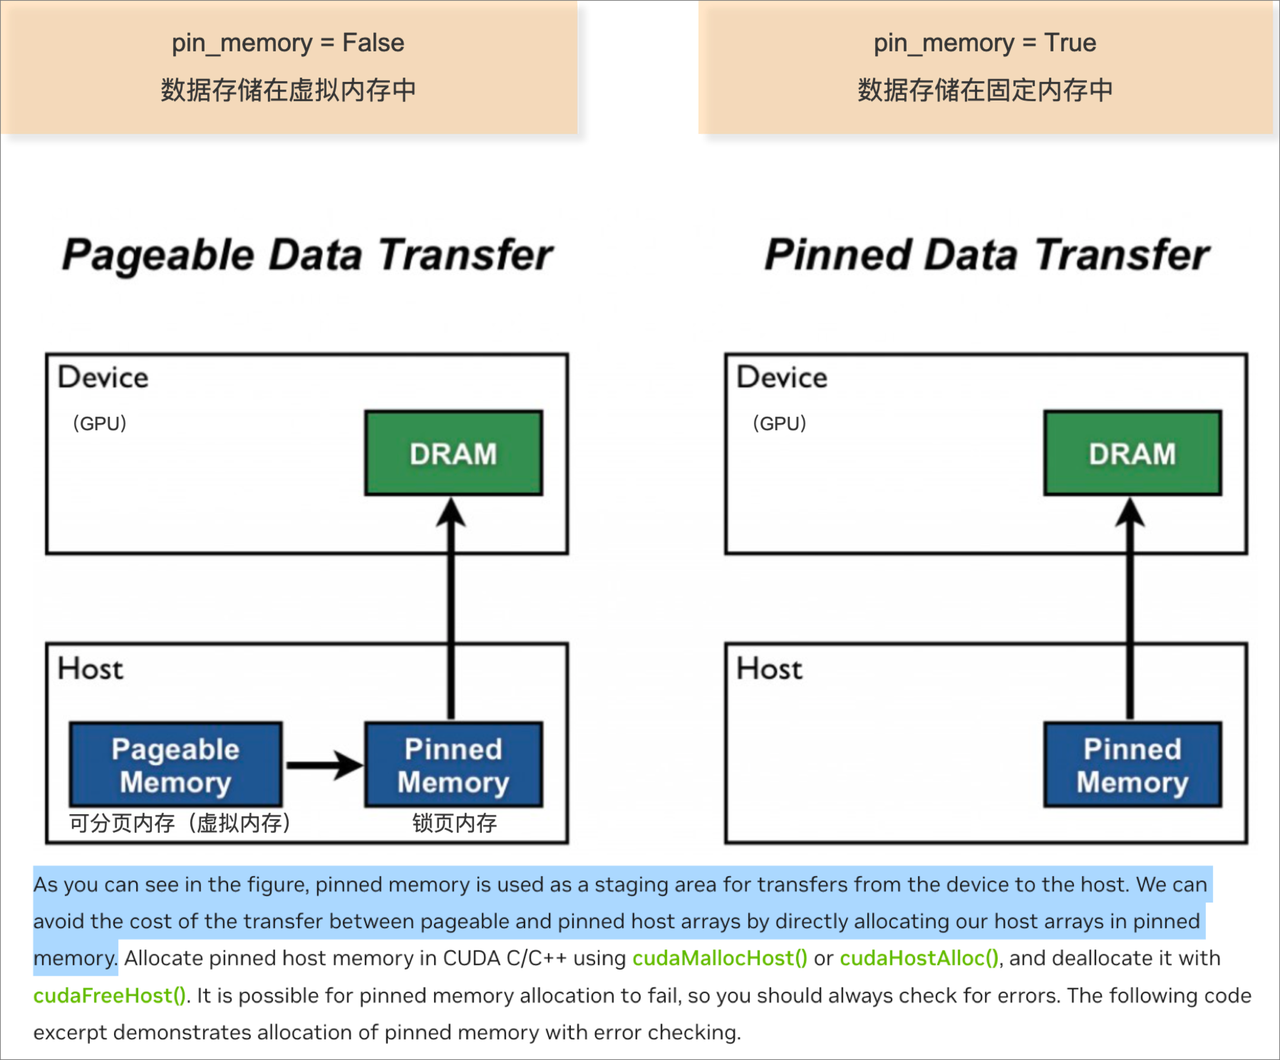

Pinned memory (锁页内存) 是指将一部分内存锁定在物理内存中，防止这部分内存被交换到磁盘上或被其他程序使用，可以提高访问速度和可靠性。避免了数据从主机内存到 GPU 显存的复制过程中的页面交换问题。这种固定在物理内存中的内存称为 Pinned memory。

Pageable memory (可分页内存) ： 是一种将物理内存划分成固定的页面，并在需要时将页面交换到磁盘上以释放内存空间的技术。

其中内存被划分为固定大小的块，称为页（page）

在使用 Pageable memory 传输数据时，数据存储在 虚拟内存 中，然后通过页面文件的方式管理数据的加载和卸载。

虚拟内存：将计算机可用的 物理内存 和 磁盘空间 组合使用，以提供更大的可用内存空间。它使用一个虚拟地址空间来代替物理地址空间，使得每个进程都认为自己有独立的内存。当进程需要访问一个虚拟地址时，操作系统会将它映射到物理地址空间中的一个位置，这个过程称为地址转换。如果物理内存不足，操作系统会将物理内存中一些不常用的数据暂存到磁盘上。

## 2）参数 num_workers
当 num_workers 参数设置得太高时，可能会导致系统资源不足。

为避免这种情况，通常建议将 num_workers 参数设置为等于或小于 CPU 核心数，以有效平衡数据加载效率和系统资源占用率。

推荐如下写法 ： 

In [ ]:
batch_size = 16
nw = min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8])   # number of workers
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size,
                                               num_workers=nw,
                                               shuffle=True,
                                               pin_memory=True,
                                               collate_fn=collate_fn)

## 3）参数 collate_fn
用于指定 Dataloader 迭代出的 batch 数据的 数据格式。

如果不指定的话，默认迭代出的 batch 的数据格式为 一个 tupe，tupe 中的每个元素，是单个样本的 （Dataset 类的）__getitem__ 方法的返回结果。

举例查看，使用默认 collate_fn 返回的 batch 数据

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data[index]
        label = self.labels[index]
        return sample, label


from torch.utils.data import DataLoader

# 假设有一些样本数据
data = [(1, 0), (2, 1), (3, 0), (4, 1), (5, 1)]
labels = [0, 1, 1, 2, 0]

# 创建 Dataset 和 DataLoader
dataset = MyDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

dataloader = iter(dataloader)
print(next(dataloader))

例 1 ：分类任务， collate_fn，使用默认的 collate_fn
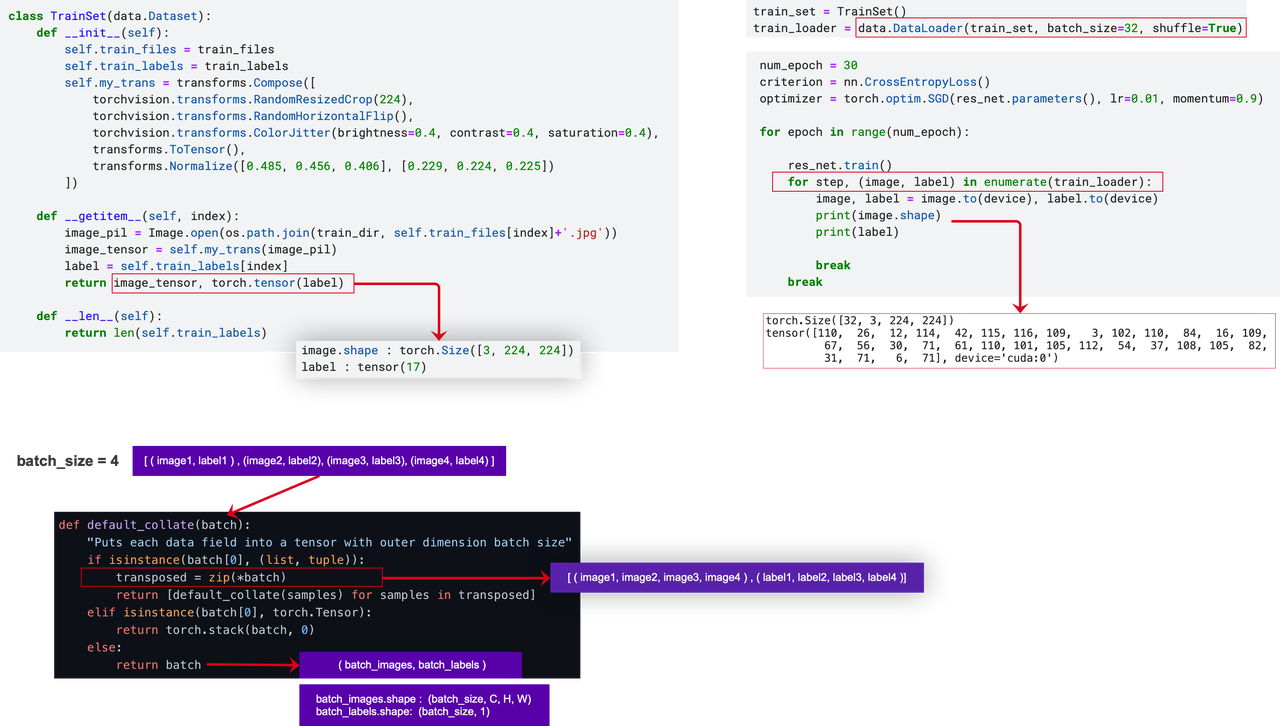

例 2 ：目标检测任务，自定义 collate_fn
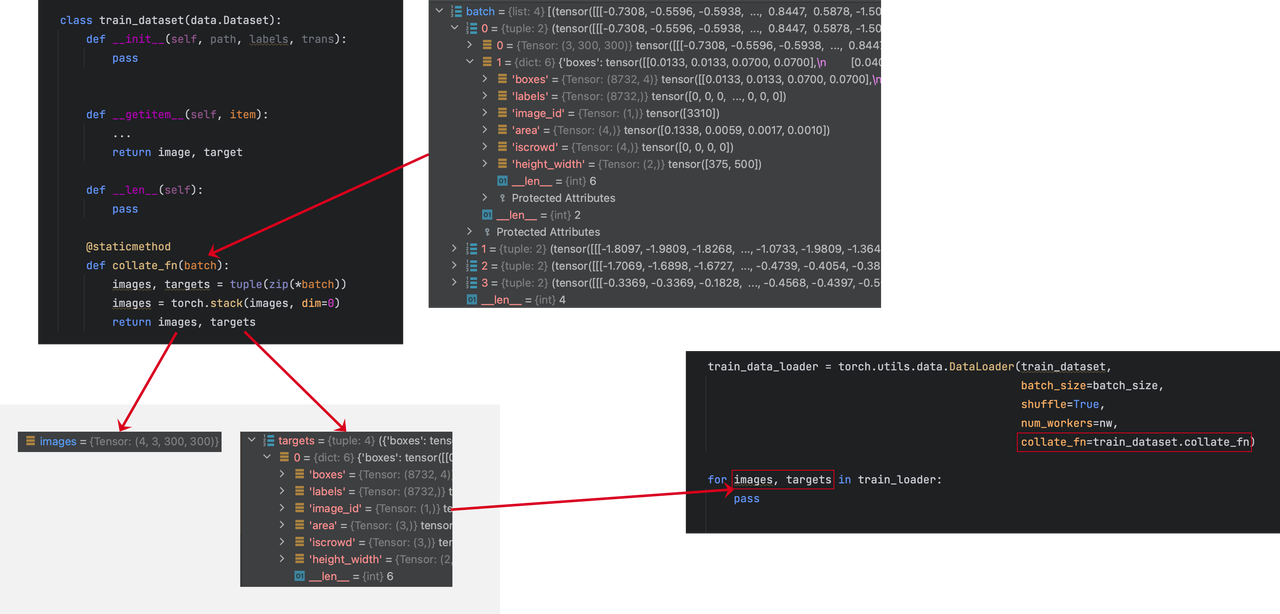